# 案例：餐饮订单数据分析
---

## 案例目标

通过此案例实操，使学生初步掌握以下内容：

1. 数据的预处理
2. 数据的统计分析
3. 数据的可视化
4. 模型的创建、训练和评估

## 案例数据

### 1. 数据文件

餐饮订单数据分为三个数据文件，分别为：

1. 用户表（users.xlsx）
2. 菜品订单表（meal_order_info.csv）
3. 菜品订单详情表（meal_order_detail.xlsx）

### 2. 数据属性

数据表的详细信息：[点击查看](data/data_desc.htm)


## 分析流程

### 1. 数据预处理

#### 1.1 导入数据

In [456]:
# 导入必需包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [457]:
!ls -l data 

total 2352
-rw-r--r--@ 1 xiaobai  staff   22858  9 27 12:46 data_desc.htm
-rw-r--r--  1 xiaobai  staff  918119  9 27 08:52 meal_order_detail.xlsx
-rw-r--r--  1 xiaobai  staff  115573  9 27 08:52 meal_order_info.csv
-rw-r--r--  1 xiaobai  staff  135889  9 27 08:52 users.xlsx


In [17]:
# 读取用户表
users = pd.read_excel('data/users.xlsx')
print('用户表记录数:',len(users))

用户表记录数: 734


In [18]:
# 读取订单信息表
meal_order_info = pd.read_csv('data/meal_order_info.csv', encoding='gbk')
print('订单信息表记录数:', len(meal_order_info))

订单信息表记录数: 945


In [458]:
# 读取订单详情表
sheet_names = ['meal_order_detail{}'.format(n) for n in range(1, 4)]
meal_order_detail_sheets = pd.read_excel('data/meal_order_detail.xlsx',
                                  sheet_name=sheet_names)
meal_order_details = [meal_order_detail_sheets[sheet_name] for sheet_name in sheet_names]
meal_order_detail = pd.concat(meal_order_details)
print('订单详情表记录数:', len(meal_order_detail))

订单详情表记录数: 10037


In [461]:
meal_order_detail['place_order_time'].head(5)

0   2016-08-01 11:05:36
1   2016-08-01 11:07:07
2   2016-08-01 11:07:40
3   2016-08-01 11:11:11
4   2016-08-01 11:11:30
Name: place_order_time, dtype: datetime64[ns]

#### 1.2 查看数据

##### 查看数据集的基本信息

1. 大小、维数和形状

In [181]:
import utils

In [182]:
# 查看用户表的大小、维数和形状
utils.print_title('用户表')
utils.print_props(users, size='大小', ndim='纬度', shape='形状')

----------用户表----------
大小: 27158
纬度: 2
形状: (734, 37)


In [183]:
# 查看订单信息表的大小、维数和形状
utils.print_title('订单信息表')
print('大小:', meal_order_info.size)
print('维数:', meal_order_info.ndim)
print('形状:', meal_order_info.shape)

----------订单信息表----------
大小: 19845
维数: 2
形状: (945, 21)


In [184]:
# 查看订单表详情表的大小、维数和形状
utils.print_title('订单详情表')
utils.print_props(meal_order_detail, size='大小', ndim='纬度',shape='形状')

----------订单详情表----------
大小: 190703
纬度: 2
形状: (10037, 19)


2. 数据类型、列名、索引和值

In [32]:
# 查看用户表数据类型
users.dtypes

USER_ID                        int64
MYID                          object
ACCOUNT                       object
NAME                          object
ORGANIZE_ID                    int64
ORGANIZE_NAME                 object
DUTY_ID                      float64
TITLE_ID                     float64
PASSWORD                      object
EMAIL                         object
LANG                         float64
THEME                        float64
FIRST_VISIT           datetime64[ns]
PREVIOUS_VISIT               float64
LAST_VISITS           datetime64[ns]
LOGIN_COUNT                  float64
ISEMPLOYEE                   float64
STATUS                       float64
IP                           float64
DESCRIPTION                   object
QUESTION_ID                  float64
ANSWER                       float64
ISONLINE                     float64
CREATED               datetime64[ns]
LASTMOD               datetime64[ns]
CREATER                      float64
MODIFYER                     float64
T

In [59]:
# 查看用户表的列名
users.columns

Index(['USER_ID', 'MYID', 'ACCOUNT', 'NAME', 'ORGANIZE_ID', 'ORGANIZE_NAME',
       'DUTY_ID', 'TITLE_ID', 'PASSWORD', 'EMAIL', 'LANG', 'THEME',
       'FIRST_VISIT', 'PREVIOUS_VISIT', 'LAST_VISITS', 'LOGIN_COUNT',
       'ISEMPLOYEE', 'STATUS', 'IP', 'DESCRIPTION', 'QUESTION_ID', 'ANSWER',
       'ISONLINE', 'CREATED', 'LASTMOD', 'CREATER', 'MODIFYER', 'TEL', 'stuNo',
       'qq', 'weixin', 'meal_arithmetic_id', 'arithmetic_name', 'sex', 'poo',
       'address', 'age'],
      dtype='object')

In [60]:
# 查看用户表的索引
users.index

RangeIndex(start=0, stop=734, step=1)

In [64]:
# 查看用户表的内部值
users.values, type(users.values)

(array([[1, 'admin', '超级管理员', ..., '广东广州', '泰迪科技', 23.0],
        [981, nan, '老师', ..., nan, nan, nan],
        [982, nan, '叶亦凯', ..., '广东广州', '广州', 21.0],
        ...,
        [1644, nan, '杜小悦', ..., '广东广州', '佛山', 23.0],
        [1645, nan, '杜雨玲', ..., '福建厦门', '广州', 37.0],
        [1646, nan, '杜依醇', ..., '广西南宁', '佛山', 46.0]], dtype=object),
 numpy.ndarray)

In [57]:
# 查看订单表数据类型
meal_order_info.dtypes

info_id                 int64
emp_id                  int64
number_consumers        int64
mode                  float64
dining_table_id         int64
dining_table_name       int64
expenditure             int64
dishes_count            int64
accounts_payable        int64
use_start_time         object
check_closed          float64
lock_time              object
cashier_id            float64
pc_id                 float64
order_number          float64
org_id                  int64
print_doc_bill_num    float64
lock_table_info       float64
order_status            int64
phone                   int64
name                   object
dtype: object

In [65]:
# 查看订单信息表的列名
meal_order_detail.columns

Index(['detail_id', 'order_id', 'dishes_id', 'logicprn_name',
       'parent_class_name', 'dishes_name', 'itemis_add', 'counts', 'amounts',
       'cost', 'place_order_time', 'discount_amt', 'discount_reason',
       'kick_back', 'add_inprice', 'add_info', 'bar_code', 'picture_file',
       'emp_id'],
      dtype='object')

In [67]:
# 查看订单信息表的索引
meal_order_info.index

RangeIndex(start=0, stop=945, step=1)

In [68]:
# 查看订单信息表的值
meal_order_info.values

array([[417, 1442, 4, ..., 1, 18688880641, '苗宇怡'],
       [301, 1095, 3, ..., 1, 18688880174, '赵颖'],
       [413, 1147, 6, ..., 1, 18688880276, '徐毅凡'],
       ...,
       [692, 1155, 8, ..., 1, 18688880327, '习一冰'],
       [647, 1094, 4, ..., 1, 18688880207, '章春华'],
       [570, 1113, 8, ..., 1, 18688880313, '唐雅嘉']], dtype=object)

In [15]:
# 查看订单详情表数据类型
meal_order_detail.dtypes

detail_id                     int64
order_id                      int64
dishes_id                     int64
logicprn_name               float64
parent_class_name           float64
dishes_name                  object
itemis_add                    int64
counts                        int64
amounts                       int64
cost                        float64
place_order_time     datetime64[ns]
discount_amt                float64
discount_reason             float64
kick_back                   float64
add_inprice                   int64
add_info                    float64
bar_code                    float64
picture_file                 object
emp_id                        int64
dtype: object

In [69]:
# 查看订单详情表的列名
meal_order_detail.columns

Index(['detail_id', 'order_id', 'dishes_id', 'logicprn_name',
       'parent_class_name', 'dishes_name', 'itemis_add', 'counts', 'amounts',
       'cost', 'place_order_time', 'discount_amt', 'discount_reason',
       'kick_back', 'add_inprice', 'add_info', 'bar_code', 'picture_file',
       'emp_id'],
      dtype='object')

In [70]:
# 查看订单详情表的索引
meal_order_detail.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610],
           dtype='int64', length=10037)

In [71]:
# 查看订单详情表的值
meal_order_detail.values

array([[2956, 417, 610062, ..., nan, 'caipu/104001.jpg', 1442],
       [2958, 417, 609957, ..., nan, 'caipu/202003.jpg', 1442],
       [2961, 417, 609950, ..., nan, 'caipu/303001.jpg', 1442],
       ...,
       [5379, 647, 610012, ..., nan, 'caipu/302001.jpg', 1094],
       [5380, 647, 610054, ..., nan, 'caipu/501003.jpg', 1094],
       [5688, 672, 609953, ..., nan, 'caipu/303004.jpg', 1089]],
      dtype=object)

##### 查看数据集的描述性统计信息

1. 数值型特征的描述性统计信息

In [76]:
# 用户表的数值型特征描述性统计信息
users.describe()

,USER_ID,ORGANIZE_ID,DUTY_ID,TITLE_ID,LANG,THEME,PREVIOUS_VISIT,LOGIN_COUNT,ISEMPLOYEE,STATUS,...,QUESTION_ID,ANSWER,ISONLINE,CREATER,MODIFYER,TEL,qq,weixin,meal_arithmetic_id,age
count,734.000000,734.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,288.000000,3.0,7.320000e+02,1.0,1.0,27.000000,732.000000
mean,1374.243869,329.653951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1051.093750,1.0,1.868120e+10,398125079.0,398125079.0,86.037037,34.202186
std,221.864932,7.389025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.724483,0.0,2.078486e+08,NaN,NaN,0.192450,9.576110
min,1.000000,130.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.0,1.306543e+10,398125079.0,398125079.0,86.000000,20.000000
25%,1194.250000,330.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1070.000000,1.0,1.868888e+10,398125079.0,398125079.0,86.000000,25.000000
50%,1377.500000,330.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1070.000000,1.0,1.868888e+10,398125079.0,398125079.0,86.000000,34.000000
75%,1560.750000,330.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1070.000000,1.0,1.868888e+10,398125079.0,398125079.0,86.000000,43.000000
max,1747.000000,330.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1070.000000,1.0,1.868888e+10,398125079.0,398125079.0,87.000000,50.000000


In [78]:
# 用户表单列数值型特征描述性统计信息
users['age'].describe()

count    732.000000
mean      34.202186
std        9.576110
min       20.000000
25%       25.000000
50%       34.000000
75%       43.000000
max       50.000000
Name: age, dtype: float64

In [79]:
# 用户表多列数值型特征描述性统计信息
users[['USER_ID', 'ORGANIZE_ID', 'age']].describe()

,USER_ID,ORGANIZE_ID,age
count,734.000000,734.000000,732.000000
mean,1374.243869,329.653951,34.202186
std,221.864932,7.389025,9.576110
min,1.000000,130.000000,20.000000
25%,1194.250000,330.000000,25.000000
50%,1377.500000,330.000000,34.000000
75%,1560.750000,330.000000,43.000000
max,1747.000000,330.000000,50.000000


In [80]:
# 订单信息表的数值型特征描述性统计信息
meal_order_info.describe()

,info_id,emp_id,number_consumers,mode,dining_table_id,dining_table_name,expenditure,dishes_count,accounts_payable,check_closed,cashier_id,pc_id,order_number,org_id,print_doc_bill_num,lock_table_info,order_status,phone
count,945.000000,945.000000,945.000000,0.0,945.000000,945.000000,945.000000,945.000000,945.000000,0.0,0.0,0.0,0.0,945.000000,0.0,0.0,945.000000,9.450000e+02
mean,771.641270,1205.673016,5.212698,NaN,1473.750265,1010.735450,492.289947,11.805291,492.289947,NaN,NaN,NaN,NaN,329.596825,NaN,NaN,0.993651,1.868888e+10
std,324.416006,168.282689,2.363710,NaN,88.661236,8.818909,268.271358,5.652749,268.271358,NaN,NaN,NaN,NaN,2.234028,NaN,NaN,0.112568,2.283489e+02
min,137.000000,982.000000,1.000000,NaN,459.000000,1001.000000,48.000000,1.000000,48.000000,NaN,NaN,NaN,NaN,304.000000,NaN,NaN,0.000000,1.868888e+10
25%,507.000000,1095.000000,3.000000,NaN,1482.000000,1005.000000,267.000000,7.000000,267.000000,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,1.000000,1.868888e+10
50%,746.000000,1148.000000,5.000000,NaN,1486.000000,1008.000000,451.000000,11.000000,451.000000,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,1.000000,1.868888e+10
75%,1078.000000,1288.000000,7.000000,NaN,1491.000000,1013.000000,698.000000,15.000000,698.000000,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,1.000000,1.868888e+10
max,1325.000000,1610.000000,10.000000,NaN,1519.000000,1040.000000,1314.000000,36.000000,1314.000000,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,2.000000,1.868888e+10


In [81]:
# 订单信息表单列数值型特征描述性统计信息
meal_order_info['dishes_count'].describe()

count    945.000000
mean      11.805291
std        5.652749
min        1.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       36.000000
Name: dishes_count, dtype: float64

In [82]:
# 订单信息表多列数值型特征描述性统计信息
meal_order_info[['expenditure', 'dishes_count', 'accounts_payable']].describe()

,expenditure,dishes_count,accounts_payable
count,945.000000,945.000000,945.000000
mean,492.289947,11.805291,492.289947
std,268.271358,5.652749,268.271358
min,48.000000,1.000000,48.000000
25%,267.000000,7.000000,267.000000
50%,451.000000,11.000000,451.000000
75%,698.000000,15.000000,698.000000
max,1314.000000,36.000000,1314.000000


In [83]:
# 订单详情表的数值型特征描述性统计信息
meal_order_detail.describe()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,itemis_add,counts,amounts,cost,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,emp_id
count,10037.000000,10037.000000,10037.000000,0.0,0.0,10037.0,10037.000000,10037.000000,0.0,0.0,0.0,0.0,10037.0,0.0,0.0,10037.000000
mean,4712.339344,802.775630,609985.155026,NaN,NaN,0.0,1.108499,44.821361,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1207.549766
std,1747.410959,320.209032,118.412398,NaN,NaN,0.0,0.611016,35.815435,NaN,NaN,NaN,NaN,0.0,NaN,NaN,166.800691
min,753.000000,137.000000,606000.000000,NaN,NaN,0.0,1.000000,1.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,982.000000
25%,3369.000000,542.000000,609952.000000,NaN,NaN,0.0,1.000000,25.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1097.000000
50%,4666.000000,780.000000,609983.000000,NaN,NaN,0.0,1.000000,35.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1147.000000
75%,5971.000000,1110.000000,610021.000000,NaN,NaN,0.0,1.000000,56.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1293.000000
max,8246.000000,1324.000000,610072.000000,NaN,NaN,0.0,10.000000,178.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1610.000000


In [86]:
# 订单详情表单列数值型特征描述性统计信息
meal_order_detail['counts'].describe()

count    10037.000000
mean         1.108499
std          0.611016
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: counts, dtype: float64

In [87]:
# 订单详情表多列数值型特征描述性统计信息
meal_order_detail[['counts', 'amounts']].describe()

,counts,amounts
count,10037.000000,10037.000000
mean,1.108499,44.821361
std,0.611016,35.815435
min,1.000000,1.000000
25%,1.000000,25.000000
50%,1.000000,35.000000
75%,1.000000,56.000000
max,10.000000,178.000000


2. 类别型特征的描述性统计信息

In [145]:
# 用户表类别型特征描述性统计:使用频数统计
users['ORGANIZE_ID'].value_counts()

330    706
328     27
130      1
Name: ORGANIZE_ID, dtype: int64

In [153]:
users['ORGANIZE_NAME'].value_counts()

统计17级    706
统计班       27
根目录        1
Name: ORGANIZE_NAME, dtype: int64

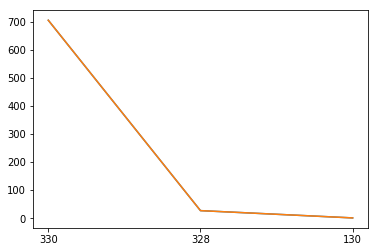

In [185]:
# 可视化：用户表类别型特征描述性统计:使用频数统计
plt.figure()
utils.plot_series(plt.gca(), users['ORGANIZE_ID'].value_counts(), True)
plt.show()

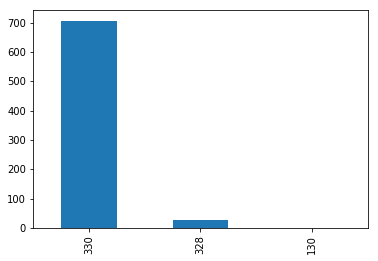

In [217]:
users['ORGANIZE_ID'].value_counts().plot(kind='bar')
plt.show()

In [198]:
# 用户表类别型特征描述性统计：describe
users['NAME'].describe()

count      734
unique     734
top       a349
freq         1
Name: NAME, dtype: object

In [199]:
users['ORGANIZE_NAME'].describe()

count       734
unique        3
top       统计17级
freq        706
Name: ORGANIZE_NAME, dtype: object

In [179]:
# 订单信息表类别型特征描述性统计：频数统计
meal_order_info['dining_table_name'].value_counts()

1005    78
1007    78
1010    71
1004    66
1003    61
1013    57
1002    54
1008    53
1001    50
1011    45
1009    42
1006    41
1012    37
1016    15
1018    14
1014    14
1021    14
1015    13
1022    13
1017    10
1023     9
1020     9
1029     8
1040     8
1025     8
1026     8
1038     7
1028     7
1030     7
1024     6
1039     6
1036     6
1027     6
1031     6
1033     4
1037     4
1032     3
1035     3
1019     3
1034     1
Name: dining_table_name, dtype: int64

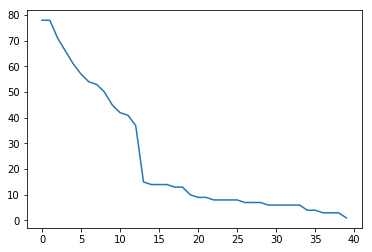

In [186]:
# 可视化：订单信息表类别型特征描述统计信息：频数统计
plt.figure()
value_counts = meal_order_info['dining_table_name'].value_counts()
# 线图
utils.plot_series(plt.gca(), value_counts)
plt.show()

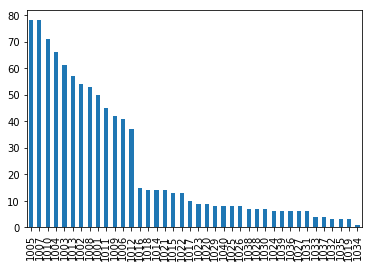

In [224]:
meal_order_info['dining_table_name'].value_counts().plot(kind='bar')

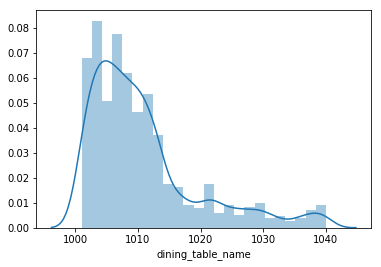

In [167]:
# 分布图
sns.distplot(meal_order_info['dining_table_name'])
plt.show()

In [96]:
meal_order_info['dining_table_id'].value_counts()

1484    72
1486    71
1489    67
1483    59
1492    55
1482    46
1487    46
1481    43
1480    43
1490    43
1488    41
1485    35
1491    35
1402    14
1493    14
1495    13
1497    13
1500    12
1494    11
1499     9
1401     9
1496     9
1505     8
1502     8
1407     8
1507     7
1501     7
1403     7
1508     7
1509     7
        ..
1512     3
1404     3
1405     3
1411     3
1510     3
1415     2
1410     2
460      2
1420     2
1417     2
1422     2
1424     2
1511     2
1514     2
1438     2
1412     2
465      1
459      1
1416     1
685      1
1426     1
1428     1
1431     1
1433     1
1434     1
1437     1
1439     1
1441     1
473      1
467      1
Name: dining_table_id, Length: 76, dtype: int64

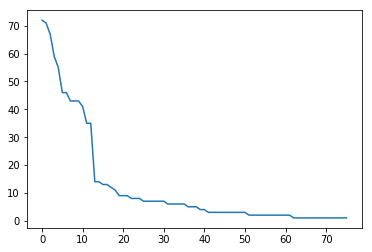

In [187]:
plt.figure()
value_counts = meal_order_info['dining_table_id'].value_counts()
# 线图
utils.plot_series(plt.gca(), value_counts)
plt.show()

In [188]:
meal_order_info['org_id'].value_counts()

330    835
328    102
304      6
329      1
310      1
Name: org_id, dtype: int64

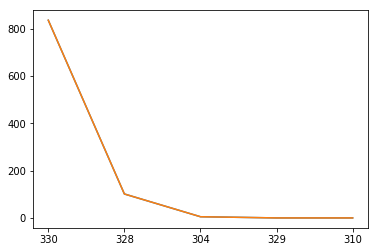

In [193]:
plt.figure()
value_counts = meal_order_info['org_id'].value_counts()
# 线图
utils.plot_series(plt.gca(), value_counts, True)
plt.show()

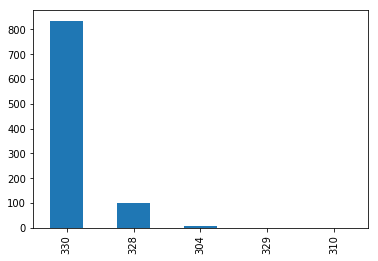

In [227]:
meal_order_info['org_id'].value_counts().plot(kind='bar')
plt.show()

In [190]:
meal_order_info['order_status'].value_counts()

1    933
0      9
2      3
Name: order_status, dtype: int64

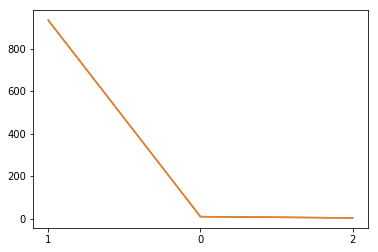

In [192]:
plt.figure()
value_counts = meal_order_info['order_status'].value_counts()
# 线图
utils.plot_series(plt.gca(), value_counts, True)
plt.show()

In [201]:
# 订单信息表的类别型特征描述型统计信息：describe
meal_order_info['org_id'].astype('category').describe()

count     945
unique      5
top       330
freq      835
Name: org_id, dtype: int64

In [202]:
# 若不进行类型转换，describe会输出数值型描述统计信息
meal_order_info['org_id'].describe()

count    945.000000
mean     329.596825
std        2.234028
min      304.000000
25%      330.000000
50%      330.000000
75%      330.000000
max      330.000000
Name: org_id, dtype: float64

In [195]:
# 订单详情表的类别型特征描述型统计信息：频数统计
meal_order_detail['dishes_name'].value_counts().head()

白饭/大碗    323
凉拌菠菜     269
谷稻小庄     239
麻辣小龙虾    216
辣炒鱿鱼     189
Name: dishes_name, dtype: int64

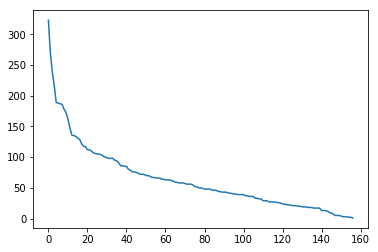

In [197]:
# 可视化：订单详情表的类别型特征描述型统计信息：频数统计
plt.figure()
value_counts = meal_order_detail['dishes_name'].value_counts()
# 线图
utils.plot_series(plt.gca(), value_counts)
plt.show()

In [203]:
# 订单详情表的类别型特征描述型统计信息：describe
meal_order_detail['dishes_name'].describe()

count     10037
unique      157
top       白饭/大碗
freq        323
Name: dishes_name, dtype: object

In [206]:
meal_order_detail['order_id'].astype('category').describe()

count     10037
unique      942
top         398
freq         36
Name: order_id, dtype: int64

In [213]:
meal_order_detail.loc[:,['counts', 'amounts']].describe()

,counts,amounts
count,10037.000000,10037.000000
mean,1.108499,44.821361
std,0.611016,35.815435
min,1.000000,1.000000
25%,1.000000,25.000000
50%,1.000000,35.000000
75%,1.000000,56.000000
max,10.000000,178.000000


In [215]:
meal_order_detail['order_id'] = meal_order_detail['order_id'].astype('category')
meal_order_detail[['order_id', 'dishes_name']].describe()

,order_id,dishes_name
count,10037,10037
unique,942,157
top,398,白饭/大碗
freq,36,323


**分析**：通过对菜品的基本情况进行查看，发现如下信息：

1. 目前所有菜品的销售均价为44.82元
2. 单个订单销售最多的菜品数量达到92份
3. 白米饭销量最好
4. 398号订单下单的菜品数量最多，多达36种

#### 1.3 数据清洗

##### 缺失值检测

In [258]:
# 检测用户表的缺失值
users_isna = users.isna()
users_isna.head(10).T

,0,1,2,3,4,5,6,7,8,9
USER_ID,False,False,False,False,False,False,False,False,False,False
MYID,False,True,True,True,True,True,True,True,True,True
ACCOUNT,False,False,False,False,False,False,False,False,False,False
NAME,False,False,False,False,False,False,False,False,False,False
ORGANIZE_ID,False,False,False,False,False,False,False,False,False,False
ORGANIZE_NAME,False,False,False,False,False,False,False,False,False,False
DUTY_ID,True,True,True,True,True,True,True,True,True,True
TITLE_ID,True,True,True,True,True,True,True,True,True,True
PASSWORD,False,False,False,False,False,False,False,False,False,False
EMAIL,False,True,True,True,True,True,True,True,True,True


In [380]:
# 或者
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 37 columns):
USER_ID               734 non-null int64
MYID                  1 non-null object
ACCOUNT               734 non-null object
NAME                  734 non-null object
ORGANIZE_ID           734 non-null int64
ORGANIZE_NAME         734 non-null object
DUTY_ID               0 non-null float64
TITLE_ID              0 non-null float64
PASSWORD              734 non-null object
EMAIL                 1 non-null object
LANG                  0 non-null float64
THEME                 0 non-null float64
FIRST_VISIT           733 non-null datetime64[ns]
PREVIOUS_VISIT        0 non-null float64
LAST_VISITS           653 non-null datetime64[ns]
LOGIN_COUNT           0 non-null float64
ISEMPLOYEE            0 non-null float64
STATUS                0 non-null float64
IP                    0 non-null float64
DESCRIPTION           1 non-null object
QUESTION_ID           0 non-null float64
ANSWER         

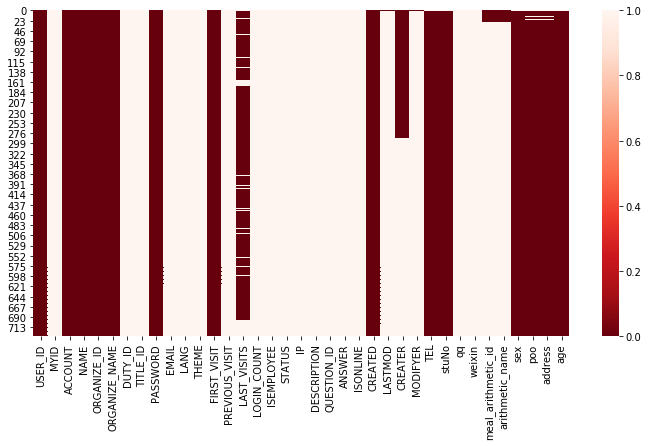

In [303]:
# 可视化用户表的缺失值
plt.figure(figsize = (12,6))
sns.heatmap(users_isna, cmap='Reds_r')
plt.show()

In [270]:
# 或者
users.isnull().head(10).T

,0,1,2,3,4,5,6,7,8,9
USER_ID,False,False,False,False,False,False,False,False,False,False
MYID,False,True,True,True,True,True,True,True,True,True
ACCOUNT,False,False,False,False,False,False,False,False,False,False
NAME,False,False,False,False,False,False,False,False,False,False
ORGANIZE_ID,False,False,False,False,False,False,False,False,False,False
ORGANIZE_NAME,False,False,False,False,False,False,False,False,False,False
DUTY_ID,True,True,True,True,True,True,True,True,True,True
TITLE_ID,True,True,True,True,True,True,True,True,True,True
PASSWORD,False,False,False,False,False,False,False,False,False,False
EMAIL,False,True,True,True,True,True,True,True,True,True


In [272]:
# 或者
pd.isna(users).head(10).T

,0,1,2,3,4,5,6,7,8,9
USER_ID,False,False,False,False,False,False,False,False,False,False
MYID,False,True,True,True,True,True,True,True,True,True
ACCOUNT,False,False,False,False,False,False,False,False,False,False
NAME,False,False,False,False,False,False,False,False,False,False
ORGANIZE_ID,False,False,False,False,False,False,False,False,False,False
ORGANIZE_NAME,False,False,False,False,False,False,False,False,False,False
DUTY_ID,True,True,True,True,True,True,True,True,True,True
TITLE_ID,True,True,True,True,True,True,True,True,True,True
PASSWORD,False,False,False,False,False,False,False,False,False,False
EMAIL,False,True,True,True,True,True,True,True,True,True


In [248]:
# 检测用户表的全空（NA）列
users.describe().loc['count'] == 0

USER_ID               False
ORGANIZE_ID           False
DUTY_ID                True
TITLE_ID               True
LANG                   True
THEME                  True
PREVIOUS_VISIT         True
LOGIN_COUNT            True
ISEMPLOYEE             True
STATUS                 True
IP                     True
QUESTION_ID            True
ANSWER                 True
ISONLINE               True
CREATER               False
MODIFYER              False
TEL                   False
qq                    False
weixin                False
meal_arithmetic_id    False
age                   False
Name: count, dtype: bool

In [287]:
# 检测订单信息表的缺失值
meal_order_info.isna().head(10).T

,0,1,2,3,4,5,6,7,8,9
info_id,False,False,False,False,False,False,False,False,False,False
emp_id,False,False,False,False,False,False,False,False,False,False
number_consumers,False,False,False,False,False,False,False,False,False,False
mode,True,True,True,True,True,True,True,True,True,True
dining_table_id,False,False,False,False,False,False,False,False,False,False
dining_table_name,False,False,False,False,False,False,False,False,False,False
expenditure,False,False,False,False,False,False,False,False,False,False
dishes_count,False,False,False,False,False,False,False,False,False,False
accounts_payable,False,False,False,False,False,False,False,False,False,False
use_start_time,False,False,False,False,False,False,False,False,False,False


In [382]:
# 或者
meal_order_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 21 columns):
info_id               945 non-null int64
emp_id                945 non-null int64
number_consumers      945 non-null int64
mode                  0 non-null float64
dining_table_id       945 non-null int64
dining_table_name     945 non-null int64
expenditure           945 non-null int64
dishes_count          945 non-null int64
accounts_payable      945 non-null int64
use_start_time        945 non-null object
check_closed          0 non-null float64
lock_time             936 non-null object
cashier_id            0 non-null float64
pc_id                 0 non-null float64
order_number          0 non-null float64
org_id                945 non-null int64
print_doc_bill_num    0 non-null float64
lock_table_info       0 non-null float64
order_status          945 non-null int64
phone                 945 non-null int64
name                  945 non-null object
dtypes: float64(7), int64(11), 

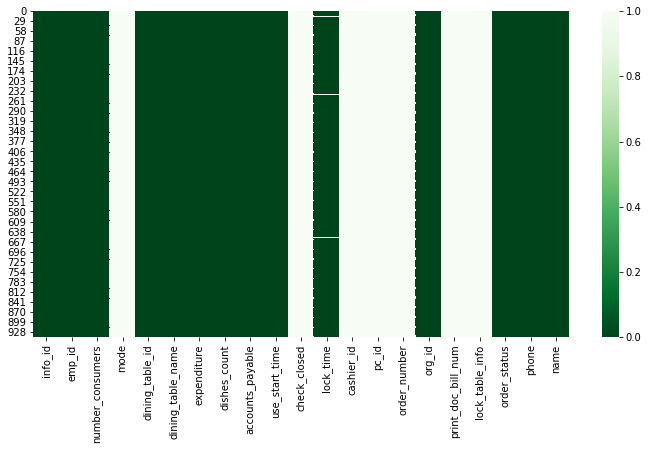

In [304]:
# 可视化订单信息表的缺失值
plt.figure(figsize=(12, 6))
sns.heatmap(meal_order_info.isna(), cmap='Greens_r')
plt.show()

In [383]:
# 检测订单信息表的全空（NA）列
meal_order_info.describe().loc['count'] == 0

info_id               False
emp_id                False
number_consumers      False
mode                   True
dining_table_id       False
dining_table_name     False
expenditure           False
dishes_count          False
accounts_payable      False
check_closed           True
cashier_id             True
pc_id                  True
order_number           True
org_id                False
print_doc_bill_num     True
lock_table_info        True
order_status          False
phone                 False
Name: count, dtype: bool

In [306]:
# 检测订单详情表的缺失值
meal_order_detail.isna().head(10).T

,0,1,2,3,4,5,6,7,8,9
detail_id,False,False,False,False,False,False,False,False,False,False
order_id,False,False,False,False,False,False,False,False,False,False
dishes_id,False,False,False,False,False,False,False,False,False,False
logicprn_name,True,True,True,True,True,True,True,True,True,True
parent_class_name,True,True,True,True,True,True,True,True,True,True
dishes_name,False,False,False,False,False,False,False,False,False,False
itemis_add,False,False,False,False,False,False,False,False,False,False
counts,False,False,False,False,False,False,False,False,False,False
amounts,False,False,False,False,False,False,False,False,False,False
cost,True,True,True,True,True,True,True,True,True,True


In [384]:
# 或者
meal_order_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
detail_id            10037 non-null int64
order_id             10037 non-null category
dishes_id            10037 non-null int64
logicprn_name        0 non-null float64
parent_class_name    0 non-null float64
dishes_name          10037 non-null object
itemis_add           10037 non-null int64
counts               10037 non-null int64
amounts              10037 non-null int64
cost                 0 non-null float64
place_order_time     10037 non-null datetime64[ns]
discount_amt         0 non-null float64
discount_reason      0 non-null float64
kick_back            0 non-null float64
add_inprice          10037 non-null int64
add_info             0 non-null float64
bar_code             0 non-null float64
picture_file         10037 non-null object
emp_id               10037 non-null int64
dtypes: category(1), datetime64[ns](1), float64(8), int64(7), object(2)
memory usage: 1.5+ MB


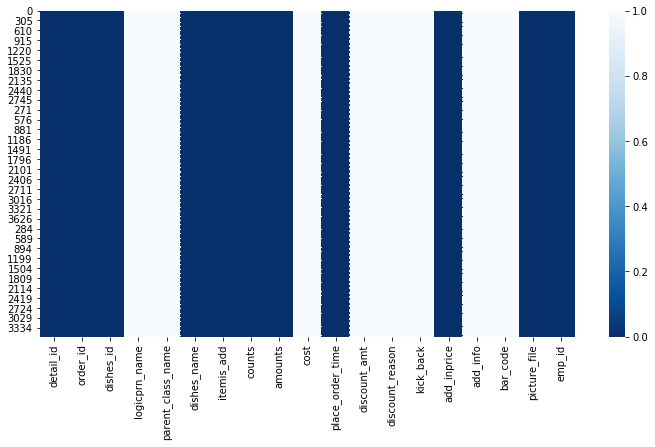

In [307]:
# 可视化订单详情表的缺失值
plt.figure(figsize=(12, 6))
sns.heatmap(meal_order_detail.isna(), cmap='Blues_r')
plt.show()

In [308]:
# 检测订单信息表的全空列
meal_order_detail.describe().loc['count'] == 0

detail_id            False
dishes_id            False
logicprn_name         True
parent_class_name     True
itemis_add           False
counts               False
amounts              False
cost                  True
discount_amt          True
discount_reason       True
kick_back             True
add_inprice          False
add_info              True
bar_code              True
emp_id               False
Name: count, dtype: bool

##### 缺失值删除

In [386]:
# 删除用户表的全空列
users_dropna = users.dropna(axis=1, how='all')

utils.print_title('用户表(删除空列前)')
utils.print_props(users, shape='形状')
utils.print_title('用户表(删除空列后)')
utils.print_props(users_dropna, shape='形状')
users_dropna.head(2).T

----------用户表(删除空列前)----------
形状: (734, 37)
----------用户表(删除空列后)----------
形状: (734, 25)


,0,1
USER_ID,1,981
MYID,admin,NaN
ACCOUNT,超级管理员,老师
NAME,admin,teacher
ORGANIZE_ID,130,328
ORGANIZE_NAME,根目录,统计班
PASSWORD,202cb962ac59075b964b07152d234b70,202cb962ac59075b964b07152d234b70
EMAIL,12@qq.com,NaN
FIRST_VISIT,NaT,2014-07-10 19:33:04
LAST_VISITS,NaT,NaT


In [387]:
# 或者,先选出全空的列
na_cols = users.describe().loc['count'] == 0
na_cols = na_cols.index[na_cols]
# 删除全空（缺失值）列
users_dropna2 = users.drop(na_cols, axis=1)

utils.print_title('用户表(删除空列前)')
utils.print_props(users, shape='形状')
utils.print_title('用户表(删除空列后)')
utils.print_props(users_dropna2, shape='形状')
users_dropna2.head(2).T

----------用户表(删除空列前)----------
形状: (734, 37)
----------用户表(删除空列后)----------
形状: (734, 25)


,0,1
USER_ID,1,981
MYID,admin,NaN
ACCOUNT,超级管理员,老师
NAME,admin,teacher
ORGANIZE_ID,130,328
ORGANIZE_NAME,根目录,统计班
PASSWORD,202cb962ac59075b964b07152d234b70,202cb962ac59075b964b07152d234b70
EMAIL,12@qq.com,NaN
FIRST_VISIT,NaT,2014-07-10 19:33:04
LAST_VISITS,NaT,NaT


In [388]:
users_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 25 columns):
USER_ID               734 non-null int64
MYID                  1 non-null object
ACCOUNT               734 non-null object
NAME                  734 non-null object
ORGANIZE_ID           734 non-null int64
ORGANIZE_NAME         734 non-null object
PASSWORD              734 non-null object
EMAIL                 1 non-null object
FIRST_VISIT           733 non-null datetime64[ns]
LAST_VISITS           653 non-null datetime64[ns]
DESCRIPTION           1 non-null object
CREATED               733 non-null datetime64[ns]
LASTMOD               3 non-null datetime64[ns]
CREATER               288 non-null float64
MODIFYER              3 non-null float64
TEL                   732 non-null float64
stuNo                 732 non-null object
qq                    1 non-null float64
weixin                1 non-null float64
meal_arithmetic_id    27 non-null float64
arithmetic_name       28 non-null 

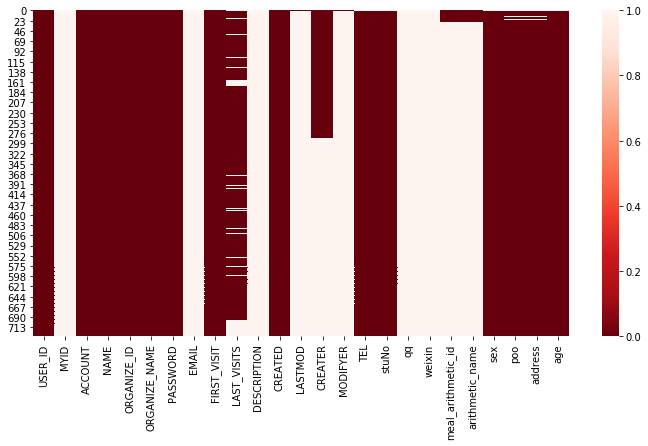

In [389]:
# 可视化删除全空列（缺失值）的用户表
plt.figure(figsize=(12, 6))
sns.heatmap(users_dropna.isna(), cmap='Reds_r')
plt.show()

In [390]:
# 删除用户表中缺失值数量占比>99%的列
thresh = int(0.01 * len(users_dropna))
users_dropna.dropna(axis=1, thresh=thresh, inplace=True)

utils.print_title('用户表(删除99%缺失值的列后)')
utils.print_props(users_dropna, shape='形状')
users_dropna.head(2).T

----------用户表(删除99%缺失值的列后)----------
形状: (734, 18)


,0,1
USER_ID,1,981
ACCOUNT,超级管理员,老师
NAME,admin,teacher
ORGANIZE_ID,130,328
ORGANIZE_NAME,根目录,统计班
PASSWORD,202cb962ac59075b964b07152d234b70,202cb962ac59075b964b07152d234b70
FIRST_VISIT,NaT,2014-07-10 19:33:04
LAST_VISITS,NaT,NaT
CREATED,NaT,2014-07-10 19:33:04
CREATER,1,1


In [391]:
users_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 18 columns):
USER_ID               734 non-null int64
ACCOUNT               734 non-null object
NAME                  734 non-null object
ORGANIZE_ID           734 non-null int64
ORGANIZE_NAME         734 non-null object
PASSWORD              734 non-null object
FIRST_VISIT           733 non-null datetime64[ns]
LAST_VISITS           653 non-null datetime64[ns]
CREATED               733 non-null datetime64[ns]
CREATER               288 non-null float64
TEL                   732 non-null float64
stuNo                 732 non-null object
meal_arithmetic_id    27 non-null float64
arithmetic_name       28 non-null object
sex                   732 non-null object
poo                   728 non-null object
address               728 non-null object
age                   732 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(9)
memory usage: 103.3+ KB


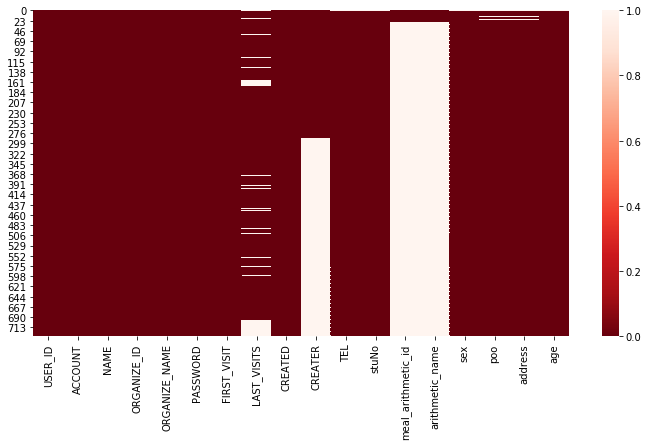

In [392]:
# 可视化用户表中具有99%以上缺失值的列的删除结果
plt.figure(figsize=(12, 6))
sns.heatmap(users_dropna.isna(), cmap='Reds_r')
plt.show()

In [393]:
# 删除订单信息表的全空（NA）列
meal_order_info_dropna = meal_order_info.dropna(axis=1, how='all')

utils.print_title('用户表(删除空列前)')
utils.print_props(meal_order_info, shape='形状')
utils.print_title('用户表(删除空列后)')
utils.print_props(meal_order_info_dropna, shape='形状')
meal_order_info_dropna.head(4).T

----------用户表(删除空列前)----------
形状: (945, 21)
----------用户表(删除空列后)----------
形状: (945, 14)


,0,1,2,3
info_id,417,301,413,415
emp_id,1442,1095,1147,1166
number_consumers,4,3,6,4
dining_table_id,1501,1430,1488,1502
dining_table_name,1022,1031,1009,1023
expenditure,165,321,854,466
dishes_count,5,6,15,10
accounts_payable,165,321,854,466
use_start_time,2016/8/1 11:05:36,2016/8/1 11:15:57,2016/8/1 12:42:52,2016/8/1 12:51:38
lock_time,2016/8/1 11:11:46,2016/8/1 11:31:55,2016/8/1 12:54:37,2016/8/1 13:08:20


In [345]:
# 或者,先选出全空的列
na_cols = meal_order_info.describe().loc['count'] == 0
na_cols = na_cols.index[na_cols]
# 删除全空（缺失值）列
meal_order_info_dropna2 = meal_order_info.drop(na_cols, axis=1)

utils.print_title('用户表(删除空列前)')
utils.print_props(meal_order_info, shape='形状')
utils.print_title('用户表(删除空列后)')
utils.print_props(meal_order_info_dropna2, shape='形状')
meal_order_info_dropna2.head(4).T

----------用户表(删除空列前)----------
形状: (945, 21)
----------用户表(删除空列后)----------
形状: (945, 14)


,0,1,2,3
info_id,417,301,413,415
emp_id,1442,1095,1147,1166
number_consumers,4,3,6,4
dining_table_id,1501,1430,1488,1502
dining_table_name,1022,1031,1009,1023
expenditure,165,321,854,466
dishes_count,5,6,15,10
accounts_payable,165,321,854,466
use_start_time,2016/8/1 11:05:36,2016/8/1 11:15:57,2016/8/1 12:42:52,2016/8/1 12:51:38
lock_time,2016/8/1 11:11:46,2016/8/1 11:31:55,2016/8/1 12:54:37,2016/8/1 13:08:20


In [396]:
meal_order_info_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
info_id              945 non-null int64
emp_id               945 non-null int64
number_consumers     945 non-null int64
dining_table_id      945 non-null int64
dining_table_name    945 non-null int64
expenditure          945 non-null int64
dishes_count         945 non-null int64
accounts_payable     945 non-null int64
use_start_time       945 non-null object
lock_time            936 non-null object
org_id               945 non-null int64
order_status         945 non-null int64
phone                945 non-null int64
name                 945 non-null object
dtypes: int64(11), object(3)
memory usage: 103.4+ KB


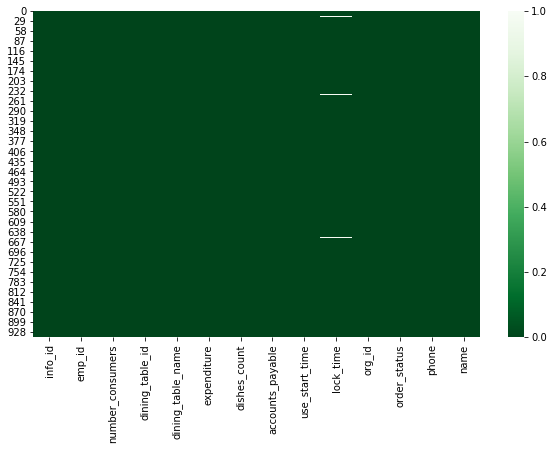

In [395]:
# 可视化删除全空列（缺失值）的订单信息表
plt.figure(figsize=(10, 6))
sns.heatmap(meal_order_info_dropna.isna(), cmap='Greens_r')
plt.show()

In [398]:
# 删除订单详情表的全空（NA）列
meal_order_detail_dropna = meal_order_detail.dropna(axis=1, how='all')

utils.print_title('用户表(删除空列前)')
utils.print_props(meal_order_detail, shape='形状')
utils.print_title('用户表(删除空列后)')
utils.print_props(meal_order_detail_dropna, shape='形状')
meal_order_detail_dropna.head(4).T

----------用户表(删除空列前)----------
形状: (10037, 19)
----------用户表(删除空列后)----------
形状: (10037, 11)


,0,1,2,3
detail_id,2956,2958,2961,2966
order_id,417,417,417,417
dishes_id,610062,609957,609950,610038
dishes_name,蒜蓉生蚝,蒙古烤羊腿\r\n\r\n\r\n,大蒜苋菜,芝麻烤紫菜
itemis_add,0,0,0,0
counts,1,1,1,1
amounts,49,48,30,25
place_order_time,2016-08-01 11:05:36,2016-08-01 11:07:07,2016-08-01 11:07:40,2016-08-01 11:11:11
add_inprice,0,0,0,0
picture_file,caipu/104001.jpg,caipu/202003.jpg,caipu/303001.jpg,caipu/105002.jpg


In [399]:
# 或者,先选出全空的列
na_cols = meal_order_detail.describe().loc['count'] == 0
na_cols = na_cols.index[na_cols]
# 删除全空（缺失值）列
meal_order_detail_dropna2 = meal_order_detail.drop(na_cols, axis=1)

utils.print_title('用户表(删除空列前)')
utils.print_props(meal_order_detail, shape='形状')
utils.print_title('用户表(删除空列后)')
utils.print_props(meal_order_detail_dropna2, shape='形状')
meal_order_detail_dropna2.head(4).T

----------用户表(删除空列前)----------
形状: (10037, 19)
----------用户表(删除空列后)----------
形状: (10037, 11)


,0,1,2,3
detail_id,2956,2958,2961,2966
order_id,417,417,417,417
dishes_id,610062,609957,609950,610038
dishes_name,蒜蓉生蚝,蒙古烤羊腿\r\n\r\n\r\n,大蒜苋菜,芝麻烤紫菜
itemis_add,0,0,0,0
counts,1,1,1,1
amounts,49,48,30,25
place_order_time,2016-08-01 11:05:36,2016-08-01 11:07:07,2016-08-01 11:07:40,2016-08-01 11:11:11
add_inprice,0,0,0,0
picture_file,caipu/104001.jpg,caipu/202003.jpg,caipu/303001.jpg,caipu/105002.jpg


In [400]:
meal_order_detail_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
detail_id           10037 non-null int64
order_id            10037 non-null category
dishes_id           10037 non-null int64
dishes_name         10037 non-null object
itemis_add          10037 non-null int64
counts              10037 non-null int64
amounts             10037 non-null int64
place_order_time    10037 non-null datetime64[ns]
add_inprice         10037 non-null int64
picture_file        10037 non-null object
emp_id              10037 non-null int64
dtypes: category(1), datetime64[ns](1), int64(7), object(2)
memory usage: 929.5+ KB


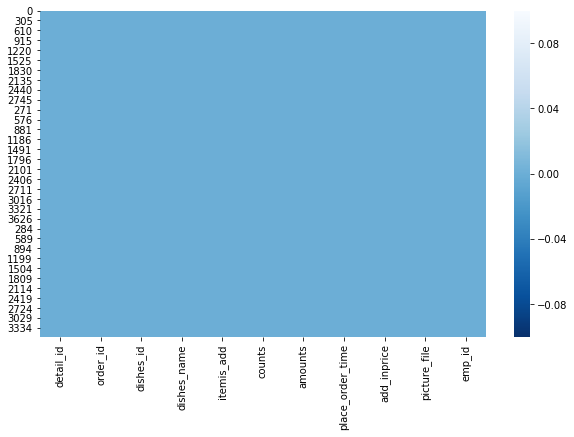

In [401]:
# 可视化删除全空列（缺失值）的订单详情表
plt.figure(figsize=(10, 6))
sns.heatmap(meal_order_detail_dropna.isna(), cmap='Blues_r')
plt.show()

##### 填充缺失值

In [402]:
# 填充用户表的缺失值：先使用反向填充bfill,再使用前向填充ffill
users_fillna = users_dropna.fillna(method='bfill')
users_fillna.fillna(method='ffill', inplace=True)
users_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 18 columns):
USER_ID               734 non-null int64
ACCOUNT               734 non-null object
NAME                  734 non-null object
ORGANIZE_ID           734 non-null int64
ORGANIZE_NAME         734 non-null object
PASSWORD              734 non-null object
FIRST_VISIT           734 non-null datetime64[ns]
LAST_VISITS           734 non-null datetime64[ns]
CREATED               734 non-null datetime64[ns]
CREATER               734 non-null float64
TEL                   734 non-null float64
stuNo                 734 non-null object
meal_arithmetic_id    734 non-null float64
arithmetic_name       734 non-null object
sex                   734 non-null object
poo                   734 non-null object
address               734 non-null object
age                   734 non-null float64
dtypes: datetime64[ns](3), float64(4), int64(2), object(9)
memory usage: 103.3+ KB


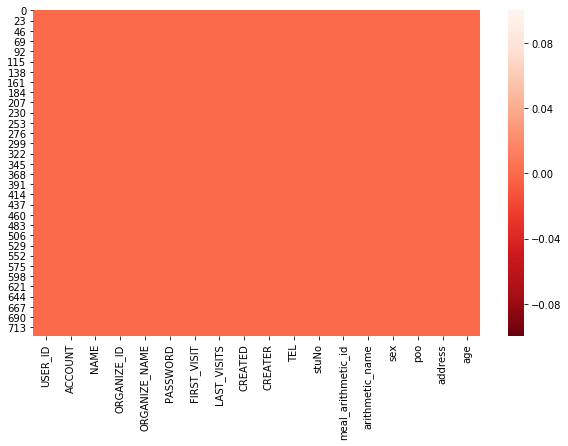

In [403]:
# 可视化填充缺失值后的用户表
plt.figure(figsize=(10, 6))
sns.heatmap(users_fillna.isna(), cmap='Reds_r')
plt.show()

**分析**：经缺失值填充，用户表（users_fillna）已无缺失值

In [428]:
# 填充订单信息表的缺失值
meal_order_info_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
info_id              945 non-null int64
emp_id               945 non-null int64
number_consumers     945 non-null int64
dining_table_id      945 non-null int64
dining_table_name    945 non-null int64
expenditure          945 non-null int64
dishes_count         945 non-null int64
accounts_payable     945 non-null int64
use_start_time       945 non-null object
lock_time            936 non-null object
org_id               945 non-null int64
order_status         945 non-null int64
phone                945 non-null int64
name                 945 non-null object
dtypes: int64(11), object(3)
memory usage: 103.4+ KB


In [437]:
# 使用use_start_time列的非空值填充lock_time列对应行的缺失值
na_rows = meal_order_info_dropna['lock_time'].isna()
meal_order_info_fillna = meal_order_info_dropna.copy()
meal_order_info_fillna.loc[na_rows, 'lock_time'] = meal_order_info_fillna[na_rows]['use_start_time']
meal_order_info_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 14 columns):
info_id              945 non-null int64
emp_id               945 non-null int64
number_consumers     945 non-null int64
dining_table_id      945 non-null int64
dining_table_name    945 non-null int64
expenditure          945 non-null int64
dishes_count         945 non-null int64
accounts_payable     945 non-null int64
use_start_time       945 non-null object
lock_time            945 non-null object
org_id               945 non-null int64
order_status         945 non-null int64
phone                945 non-null int64
name                 945 non-null object
dtypes: int64(11), object(3)
memory usage: 103.4+ KB


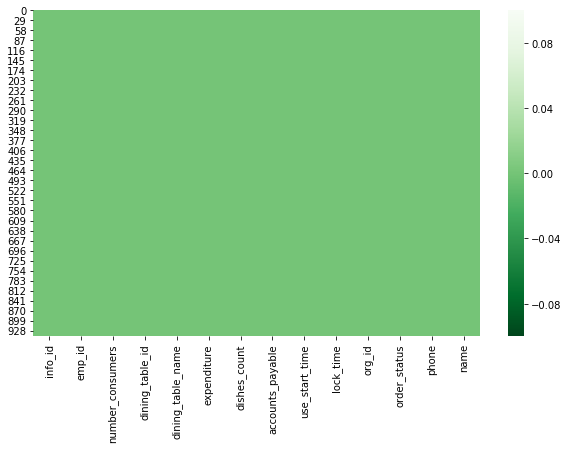

In [439]:
# 可视化填充缺失值后的订单信息表
plt.figure(figsize=(10, 6))
sns.heatmap(meal_order_info_fillna.isna(), cmap='Greens_r')
plt.show()

**分析**：经缺失值填充，订单信息表（meal_order_fillna）已无缺失值

In [440]:
# 显示订单详情表的信息
meal_order_detail_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
detail_id           10037 non-null int64
order_id            10037 non-null category
dishes_id           10037 non-null int64
dishes_name         10037 non-null object
itemis_add          10037 non-null int64
counts              10037 non-null int64
amounts             10037 non-null int64
place_order_time    10037 non-null datetime64[ns]
add_inprice         10037 non-null int64
picture_file        10037 non-null object
emp_id              10037 non-null int64
dtypes: category(1), datetime64[ns](1), int64(7), object(2)
memory usage: 929.5+ KB


**分析**：经缺失值（空列）删除，订单详情表（meal_order_detail_dropna）已无缺失值，无需填充。

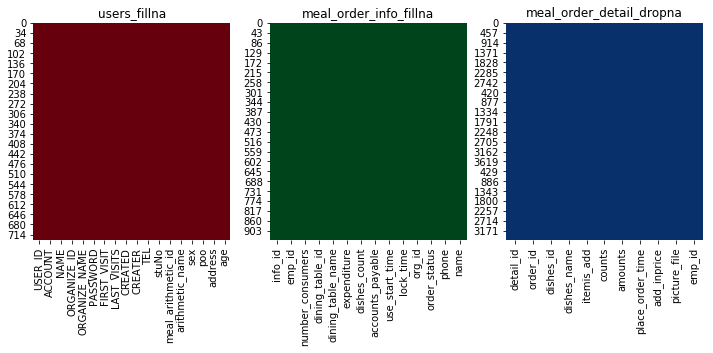

In [455]:
# 可视化上述三个表的缺失值删除和填充的结果
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.heatmap(users_fillna.isna(), ax=ax1, cmap='Reds_r', cbar=False)
sns.heatmap(meal_order_info_fillna.isna(), ax=ax2, cmap='Greens_r', cbar=False)
sns.heatmap(meal_order_detail_dropna.isna(), ax=ax3, cmap='Blues_r', cbar=False)

ax1.set_title('users_fillna')
ax2.set_title('meal_order_info_fillna')
ax3.set_title('meal_order_detail_dropna')
plt.show()